# Unsupervised Learning

Unsupervised learning in artificial intelligence is a type of machine learning that learns from data without human supervision. Unlike supervised learning, unsupervised machine learning models are given unlabeled data and allowed to discover patterns and insights without any explicit guidance or instruction.

**Dimension reduction** and **Clustering** are two fundamental unsupervised learning problems. In this lecture, we will learn PCA which is one dimension reduction technique.

**Dimension reduction:** The ambient dimension of the datapoints $x^{(1)}, \dots, x^{(m)} \in \mathbb{R}^d$ far exceeds their number, i.e. $d\gg m$. Thus, one instantly faces some computational obstacles—for a start, determining one of these pairwise distances ($\|x^{(i)}-x^{(j)}\|_2$) exactly has a high cost proportional to $d$. Dimension reduction reduces the dimension $d$.

# Principal Component Analysis (PCA)

PCA is a popular technique in dimension reduction. It is closely related to eigendecomposition and singular value decomposition.

**PCA:** The idea of PCA is simple — reduce the number of variables $d$, while preserving as much information as possible.

Statistical explanation: Principal components are a sequence of projections of the data, mutually uncorrelated and ordered in variance. See this page: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

Mathematical explanation: Principal components analysis projects all data point $x^{(i)}$ to a k-dimensional subspace such that the total distance between $x^{(i)}$ and projected $x^{(i)}$ is as small as possible. See picture below
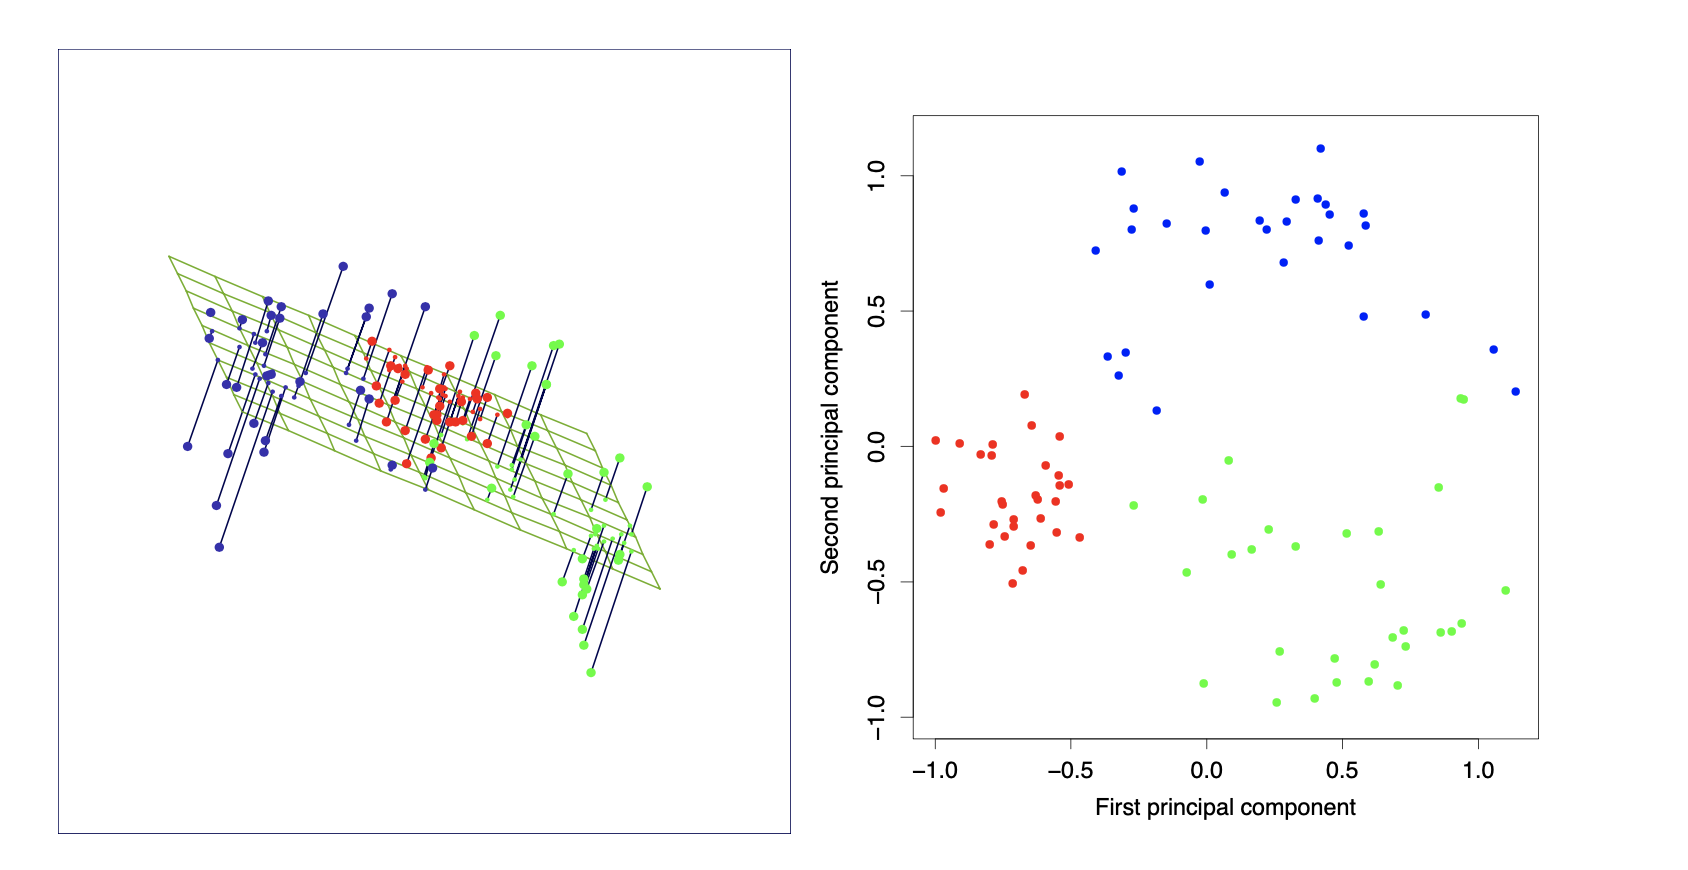
Picture is taken from book: "The Elements of Statistical Learning - Data Mining, Inference, and Prediction", Second edition by Trevor Hastie, Robert Tibshirani, and Jerome Friedman.

**Computation:** 
Theorem 8.1 from book "Mathematical Pictures at a Data Science Exhibition" by Simon Foucart. The best k-dimensional subspace is obtained by finding singular vectors of data matrix $X$.

Recall the relation between singular value decomposition and eigendecomposition, we can also compute eigendecomposition of $X^TX$ or $XX^T$ (depending on how your store your data). Such matrices is also called empirical covariance matrix.


There is a method `sklearn.decomposition.PCA`, but let's do PCA using linear algebra.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# read data
data = load_iris()
X = data.data
y = data.target

In [2]:
X.shape         # 150 data points and 4 features
y.shape         # 150 data points

(150,)

# Step by step PCA

#### Step 1: Standardization 

- The range of variables is calculated and standardized in this process to analyze the contribution of each variable equally.

- Calculating the initial variables will help you categorize the variables that are dominating the other variables of small ranges.

- Formula: for each feature, minus mean and then divided by standard deviation

In [3]:
X_standard = (X - np.mean(X,axis=0))/np.std(X,axis=0)

**Standardization is important**

Dataset copyright: Angela Fan, and Jordyn Fuchs

In [3]:
########################## You are not able to run this because you do not have dataset
import pandas as pd
df = pd.read_csv("spotify_processed.csv")
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,is_popular
0,60,257105,0,0.704,0.599,1,-8.938,0,0.0350,0.67400,0.000801,0.2330,0.2980,140.023,1,70,0
1,62,238800,0,0.719,0.604,3,-7.395,0,0.0281,0.10500,0.000000,0.1070,0.5650,99.993,1,106,0
2,56,142201,0,0.453,0.643,4,-9.842,0,0.0913,0.08550,0.000621,0.0891,0.3180,91.992,1,30,0
3,48,351236,0,0.624,0.124,8,-11.191,0,0.0280,0.91700,0.000000,0.1200,0.2060,78.014,1,4,1
4,48,323066,0,0.499,0.775,3,-5.400,0,0.0323,0.05020,0.806000,0.1500,0.0825,126.923,1,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57532,0,192551,0,0.815,0.660,0,-7.680,1,0.2500,0.38100,0.000000,0.1280,0.6430,101.006,1,67,1
57533,30,254506,0,0.664,0.871,4,-3.189,1,0.0362,0.05600,0.000000,0.0677,0.6010,119.996,1,61,1
57534,18,161235,0,0.553,0.359,8,-8.708,1,0.0357,0.67800,0.000000,0.1090,0.2970,100.616,1,108,1
57535,0,167450,0,0.449,0.836,5,-2.910,1,0.0370,0.00074,0.000000,0.3130,0.6940,141.900,1,85,1


In [7]:
########################## You are not able to run this because you do not have dataset
# PCA without standarization
spotify = df.to_numpy()
from sklearn.decomposition import PCA

pca = PCA(n_components=5,svd_solver='full')
spotify_PCA = pca.fit_transform(spotify)
print(pca.explained_variance_ratio_)

[9.99999777e-01 9.76742635e-08 7.70762651e-08 4.48515586e-08
 2.11486980e-09]


In [10]:
########################## You are not able to run this because you do not have dataset
# PCA with standarization
spotify_standard = (spotify - np.mean(spotify,axis=0))/np.std(spotify,axis=0)

pca = PCA(n_components=5,svd_solver='full')
spotify_PCA = pca.fit_transform(spotify_standard)
print(pca.explained_variance_ratio_)

[0.17986268 0.10478591 0.09076988 0.07342735 0.06805717]


#### Step 2: SVD

In [4]:
U, sigma, V = np.linalg.svd(X_standard)

#### Step 3: Create new features and visualize

new features are created by using singular vectors V as coefficients

In [1]:
X_pca = X_standard @ V.T

NameError: name 'X_standard' is not defined

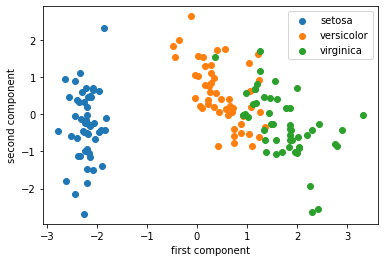

In [6]:
target_name = ['setosa', 'versicolor', 'virginica']
for label in np.unique(y):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], label=target_name[label])
    plt.legend()
    
plt.xlabel('first component')
plt.ylabel('second component')
plt.show()

In [7]:
a = np.var(X_pca,axis=0)
b = a/np.sum(a)
np.cumsum(b)

array([0.72962445, 0.95813207, 0.99482129, 1.        ])

# Sklearn command

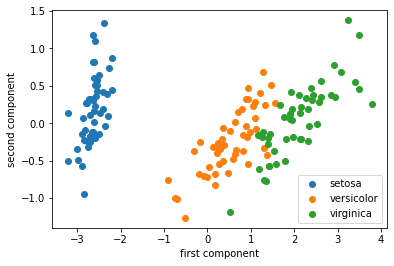

[0.92461872 0.05306648]


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2,svd_solver='full')
X_pca_sklearn = pca.fit_transform(X)

target_name = ['setosa', 'versicolor', 'virginica']
for label in np.unique(y):
    plt.scatter(X_pca_sklearn[y==label, 0], X_pca_sklearn[y==label, 1], label=target_name[label])
    plt.legend()
    
plt.xlabel('first component')
plt.ylabel('second component')
plt.show()

print(pca.explained_variance_ratio_)

**Comments: sklearn.decomposition.PCA does not normalize data**

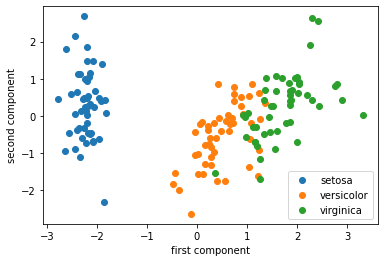

[0.72962445 0.22850762]


In [9]:
pca = PCA(n_components=2,svd_solver='full')
X_pca_sklearn = pca.fit_transform(X_standard)

target_name = ['setosa', 'versicolor', 'virginica']
for label in np.unique(y):
    plt.scatter(X_pca_sklearn[y==label, 0], X_pca_sklearn[y==label, 1], label=target_name[label])
    plt.legend()
    
plt.xlabel('first component')
plt.ylabel('second component')
plt.show()

print(pca.explained_variance_ratio_)

There is a trade-off.

For visualization purpose, we have to choose $k=2$ or $k=3$ since we can only draw 2D and 3D plot.

For best approximation, it is likely that $k>3$.

# Disadvantages of PCA:

It is a linear method in the sense that we are finding best linear approximation. It does not work for nonlinear structure. To overcome this issue, we can do kernel PCA or other dimension reduction techniques (locally linear embedding)